In [1]:
import sys
import platform
from os.path import join, exists, abspath, dirname
from os import getcwd, makedirs
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import scipy
from sklearn.metrics import r2_score
import seaborn as sns

from tqdm import tqdm

In [2]:
import nibabel as nb
from nilearn import plotting, image
from nipype.interfaces import fsl

In [3]:
dir_current = getcwd().replace('\\','/')

tmp = dir_current.split('/')
idx = [ii for ii, s in enumerate(tmp) if s=='github'][0]

dir_git = '/'.join(tmp[:idx+1])
dir_git

'/home/sungbeenpark/github'

In [4]:
dname = join(dir_git,'nitools')
sys.path.append(dname)
import nitools as nt

In [5]:
dname = join(dir_git,'SUITPy')
sys.path.append(dname)
import SUITPy as suit

In [6]:
dname = join(dir_git)
sys.path.append(dname)
import surfAnalysisPy as surf

In [7]:
dname = join(dir_git,'SeqSpatialSupp_fMRI')
sys.path.append(dname)
from SSS import deal_spm
from SSS import util as su
from SSS import plot as splt
from SSS import image as simage

---

In [26]:
list_subj = su.get_list_sn()

In [20]:
list_roi = simage.get_list_roi()
list_param = [[4,14],[5,15],[6,16],[7,17],[8,18],[9,19]]

### check the design matrix and the basis function

In [8]:
dir_root = su.get_dir_root()
dir_root

'/mnt/f/SeqSpatialSupp_fMRI'

In [9]:
subj = 'S01'
glm = 1

dir_glm = su.get_dir_glm(glm)
SPM = join(dir_glm,subj,'SPM.mat')
exists(SPM)
# SPM = deal_spm.load_SPM(SPM)

True

In [10]:
df_onset = deal_spm.get_df_onset(SPM)
df_onset

,run,reg,onset
0,1,"(1,L)","[111.03, 156.03, 176.03, 231.03, 236.03, 316.0..."
1,1,"(1,S)","[26.03, 61.03, 66.03, 76.03, 146.03, 161.03, 2..."
2,1,"(2,L)","[21.03, 31.03, 136.03, 216.03, 271.03000000000..."
3,1,"(2,S)","[6.03, 36.03, 46.03, 56.03, 131.03, 151.03, 24..."
4,1,"(3,L)","[41.03, 81.03, 86.03, 106.03, 116.03, 186.03, ..."
...,...,...,...
59,8,"(2,S)","[11.03, 131.03, 141.03, 166.03, 241.03, 246.03..."
60,8,"(3,L)","[21.03, 36.03, 41.03, 61.03, 146.03, 176.03, 1..."
61,8,"(3,S)","[46.03, 156.03, 161.03, 256.03000000000003, 31..."
62,8,"(4,L)","[16.03, 66.03, 111.03, 226.03, 231.03, 276.030..."


In [11]:
# onsets_by_run = deal_spm.get_concat_onset(SPM)

<Axes: >

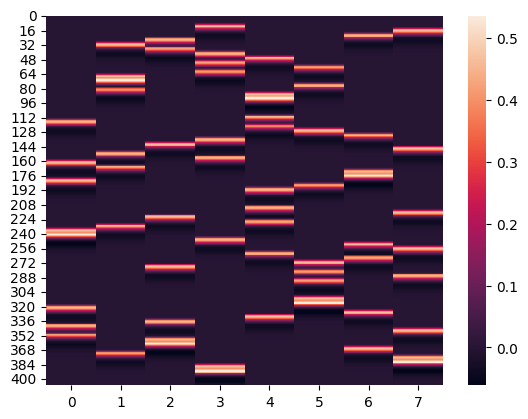

In [12]:
X = deal_spm.get_SPM_X(SPM, run=1)
sns.heatmap(X)

---

## FreeSurfer

Atlas

In [13]:
dir_atlas = su.get_dir_atlas()

In [14]:
dname = join(dir_git,'surfAnalysisPy')
# underlay = su.get_underlay(dname, hemi='L')
border = simage.get_border(dname, hemi='L')

In [15]:
# list_roi = ['SMA', 'PMv', 'PMd', 'M1', 'S1', 'SPLa', 'SPLp', 'DSVC', 'MT+', 'VSVC', 'EAC']
list_roi = simage.get_list_roi()
list_roi

array(['S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', 'SPLp'], dtype='<U4')

9 [0 1 2 3 4 5 6 7 8]


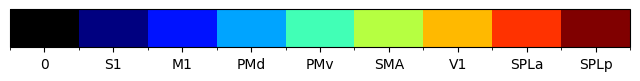

In [16]:
# data = nb.load(join(dir_atlas,'ROI.L.SSS.label.gii'))
data = nb.load(join(dir_atlas,'ROI.32k.L.label.gii'))
tmp = np.unique(data.darrays[0].data)
print(len(tmp), tmp)

cmap = splt.cmap_for_cbar(list_roi, cmap='jet')

<Axes: >

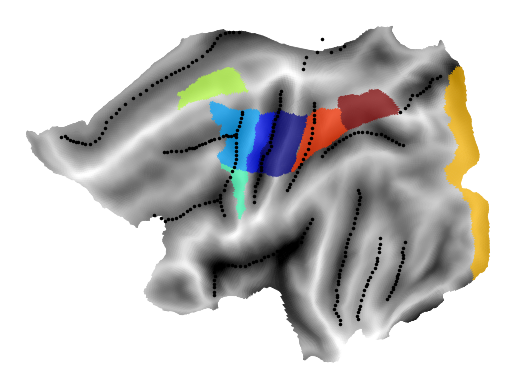

In [17]:
fig, ax = plt.subplots()

plt.sca(ax)
surf.plot.plotmap(
    data=data,
    surf='fs32k_L',
    alpha=0.7, cmap=cmap, colorbar=False,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
# fig.savefig(
#     join(dir_result,'fig.ROI.png'),
#     dpi=300, facecolor=[1,1,1,1],
#     bbox_inches='tight'
# )

## Deformated ROIs

In [18]:
dir_roi = su.get_dir_roi()
dir_anat = su.get_dir_anat()

In [19]:
subj = 'S01'
underlay = join(dir_anat,subj,'%s_anatomical.nii'%subj)

In [20]:
img_roi = simage.load_summed_roi(subj, list_roi)

In [21]:
for ii, roi in enumerate(list_roi):
    idx = img_roi.get_fdata()==(ii+1)
    print(roi, idx.sum())

S1 1114
M1 565
PMd 1618
PMv 526
SMA 900
V1 1514
SPLa 1008
SPLp 1203


In [22]:
# plotting.view_img(
#     stat_map_img=img_roi,
#     bg_img=underlay,
#     cmap=cmap, colorbar=False,
#     symmetric_cmap=False, vmin=0, vmax=tmp.max()
# )

In [23]:
del img_roi

In [24]:
# for ss in ['S','R']:
#     subj = ss+nn
    
#     S_id = subj.replace('R','S')
#     underlay = join(dir_anat,S_id,'%s_anatomical.nii'%S_id)
#     img_roi = load_roi(subj,glm)
    
#     fig, ax = plt.subplots()
    
#     g = plotting.plot_roi(
#         roi_img=img_roi,
#         bg_img=underlay,
#         cut_coords=[-30, -72, 54], draw_cross=False,
#         cmap=cmap, colorbar=False,
#         # view_type='contours',
#         black_bg=True,
#         axes=ax
#     )
#     ax.set_title(subj)
    
#     # fig.savefig(
#     #     join(dir_result,'fig.%s.ROI.volume.%s.png'%(glm,subj)),
#     #     dpi=300, facecolor=[1,1,1,1],
#     #     bbox_inches='tight'
#     # )

---

### Extracted $ys$ by Matlab

In [25]:
# def load_ts(subj,glm,dir_work):
#     ## load data
#     matfile = join(dir_work,'%s.glm%d.11rois.mat'%(subj,glm))
#     file = h5py.File(matfile)
#     data = file['Q']
#     D = data['Y']['D']
#     onsets = D['ons'][:].flatten()
#     start_sess = D['start_sess'][:].flatten()

#     ## arrange the data
#     dict_y = {}
#     for ss in ['y_raw','y_adj','y_hat','y_res']:
#         tmp = np.copy(data['Y'][ss][:])
#         dict_y[ss] = tmp
    
#     return dict_y, onsets, start_sess

In [26]:
# def plot_ts(subj, glm, dir_root, list_roi):
#     ## initialize variables
#     list_run = ['r%02d'%(ii+1) for ii in range(8)]
    
#     ## define directories
#     dir_roi = join(dir_root,'ROI')
#     dir_work = join(dir_roi,'glm%d'%glm,subj)
#     dir_result = dir_work

#     ## load time series
#     dict_y, onsets, start_sess = load_ts(subj, glm, dir_work)
    
#     ## plot the figure
#     nrows = 8
#     for ii, roi in enumerate(list_roi):
#         fig, axs = plt.subplots(nrows=nrows, figsize=(30,3*nrows))
#         for rr, run in enumerate(list_run):
#             ax = axs[rr]
#             plt.sca(ax)
        
#             idx_tr = np.arange(410*rr,410*(rr+1))
#             idx_trial = np.arange(68*rr,68*(rr+1))
            
#             df = pd.DataFrame()
#             for ss in ['y_adj','y_hat','y_res']:
#                 df[ss] = dict_y[ss][ii,idx_tr]
            
#             sns.lineplot(data=df, ax=ax)
#             xticks = sorted(onsets[idx_trial]) - start_sess[rr]
#             ax.set_xticks(xticks)
#             xticklabels = ['%d'%(int(t)) for t in xticks]
#             ax.set_xticklabels(xticklabels, rotation=30)
#             ax.grid(axis='both')
#             handles, labels= ax.get_legend_handles_labels()
#             ax.legend(handles=handles, labels=labels, loc='upper left')
#             ax.set_ylabel(run, fontsize=15)
#             ax.set_title('%s (%s)'%(subj,roi), fontsize=15, loc='left')
        
#         fig.savefig(
#             join(dir_result,'fig.ts.%s.%s.png'%(subj,roi)),
#             dpi=300, facecolor=[1,1,1,1],
#             bbox_inches='tight'
#         )
#         plt.close(fig)

In [27]:
# for ss in ['S','R']:
#     for nn in list_nn:
#         subj = ss+nn
#         plot_ts(subj=subj, glm=3, dir_root='/mnt/f/SeqSpatialSupp_fMRI', list_roi=list_roi)

---

### Canonical HRF library

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.099000e-04,4.208300e-05,1.413100e-05,2.812500e-07,-1.904500e-05,-0.000065,-0.000134,-0.000444,-2.439000e-07,1.585000e-10,9.777200e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,6.019900e-04,2.836200e-04,1.199800e-04,9.923700e-06,-7.076500e-05,-0.000166,-0.000277,-0.000703,-1.176300e-06,1.769400e-08,9.352000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.567200e-03,8.319600e-04,4.025000e-04,6.053000e-05,-1.372300e-04,-0.000278,-0.000417,-0.000912,-2.383700e-06,2.595400e-07,3.808200e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,3.009000e-03,1.736000e-03,9.232700e-04,2.017500e-04,-1.843600e-04,-0.000377,-0.000541,-0.001081,-1.624000e-06,1.659400e-06,3.862700e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2.154600e-17,5.303800e-18,5.246700e-18,-1.491800e-13,-7.158700e-08,-0.000007,-0.000056,-0.000214,-1.271300e-04,-3.078200e-05,-4.049300e-06,-4.854900e-07,-7.904600e-08,-1.166900e-08,-5.406800e-09,-5.896400e-09,-8.641800e-08,-1.612800e-08,1.030700e-08,5.588100e-08
497,1.976400e-17,4.845200e-18,4.786500e-18,-1.392200e-13,-6.930700e-08,-0.000006,-0.000055,-0.000212,-1.255800e-04,-3.016700e-05,-3.925000e-06,-4.652800e-07,-7.503500e-08,-1.096900e-08,-5.065200e-09,-5.532700e-09,-8.242800e-08,-1.610700e-08,9.947800e-09,5.417900e-08
498,1.812900e-17,4.426200e-18,4.366700e-18,-1.299100e-13,-6.709800e-08,-0.000006,-0.000055,-0.000210,-1.240500e-04,-2.956400e-05,-3.804300e-06,-4.458900e-07,-7.122300e-08,-1.031000e-08,-4.744700e-09,-5.191100e-09,-7.861700e-08,-1.608600e-08,9.601400e-09,5.252800e-08
499,1.662900e-17,4.043300e-18,3.983600e-18,-1.212300e-13,-6.495900e-08,-0.000006,-0.000054,-0.000209,-1.225300e-04,-2.897300e-05,-3.687200e-06,-4.272800e-07,-6.759900e-08,-9.689700e-09,-4.444100e-09,-4.870000e-09,-7.497600e-08,-1.606500e-08,9.267100e-09,5.092700e-08


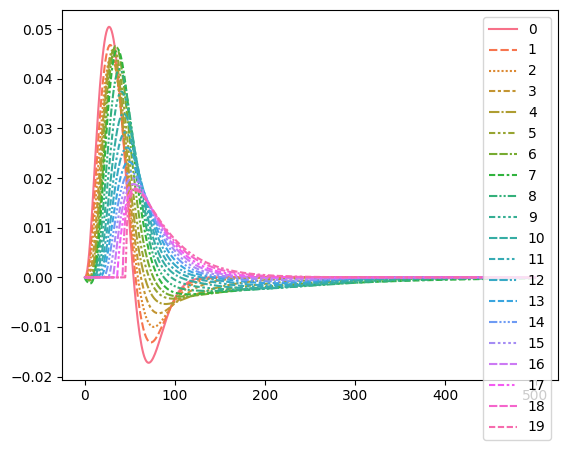

In [28]:
fname = join(su.get_dir_SSS(),'getcanonicalhrflibrary.tsv')
df = pd.read_csv(fname, delimiter='\t', header=None)
sns.lineplot(data=df)
df

In [29]:
df_tmp = df.reset_index().melt(id_vars='index', var_name='No.', value_name='hrf').rename(columns={'index':'x'})
df_tmp

,x,No.,hrf
0,0,0,0.000000e+00
1,1,0,1.099000e-04
2,2,0,6.019900e-04
3,3,0,1.567200e-03
4,4,0,3.009000e-03
...,...,...,...
10015,496,19,5.588100e-08
10016,497,19,5.417900e-08
10017,498,19,5.252800e-08
10018,499,19,5.092700e-08


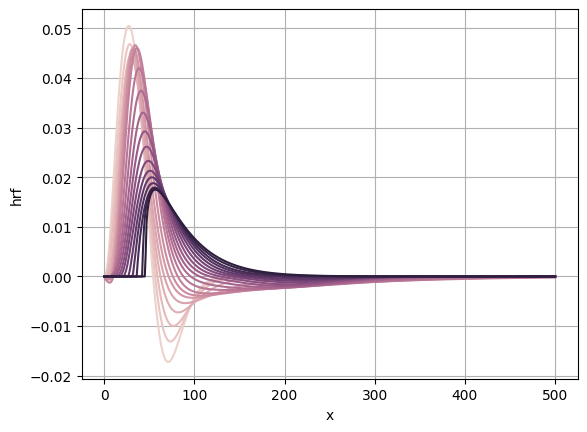

In [30]:
g = sns.lineplot(
    data=df_tmp,
    x='x', y='hrf', hue = 'No.'
)
g.legend().remove()
g.grid(axis='both')

---

### Load HRF from `xBF.mat`

In [9]:
glm = 1
dir_glm = su.get_dir_glm(glm)

#### 1. hrf

In [29]:
subj = 'S01'

/home/sungbeenpark/anaconda3/envs/sss/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


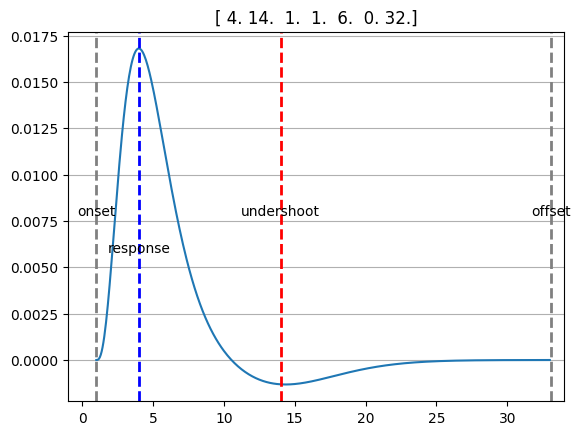

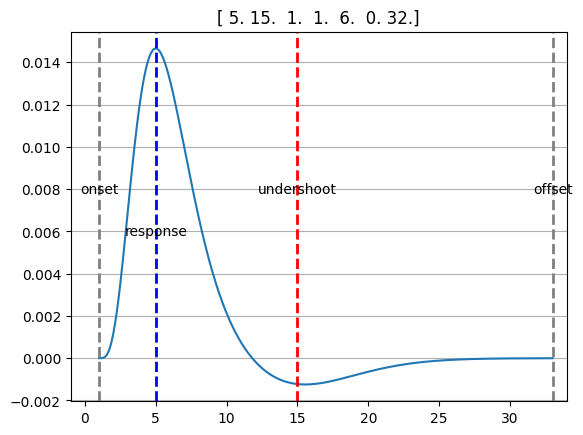

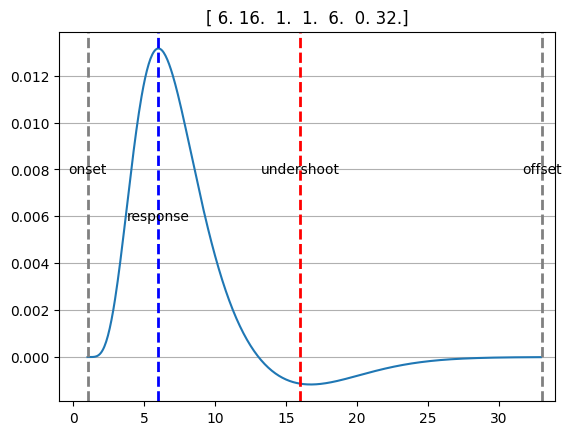

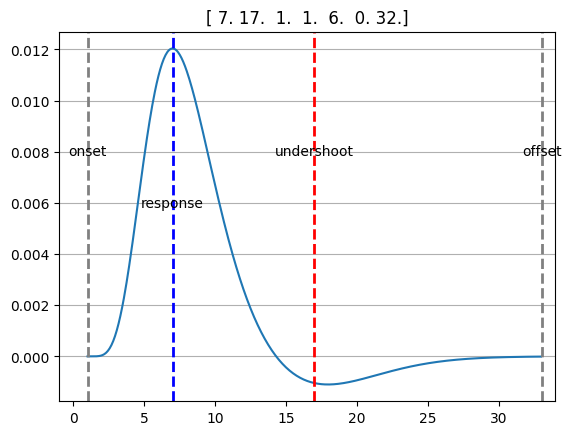

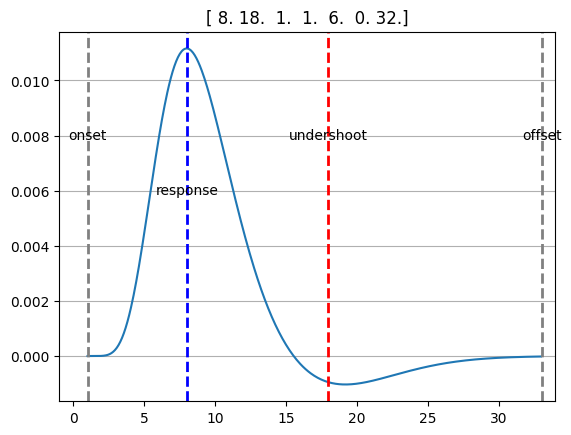

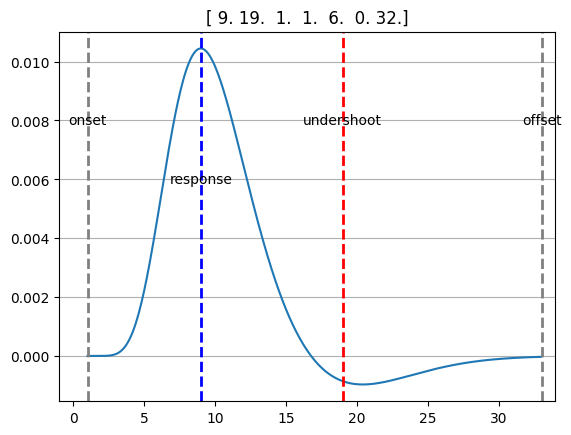

In [30]:
for param in [[4,14],[5,15],[6,16],[7,17],[8,18],[9,19]]:
    fname = join(dir_glm,subj,'hrf_tune/xBF_%s.mat'%deal_spm.convert_param_to_hrf(param, type='str'))
    xBF = deal_spm.get_xBF_params(fname)
    splt.plot_BF(xBF)

#### 2. overall response of $X$ by run

In [31]:
subj = 'S01'

In [32]:
SPM = join(dir_glm, subj,'SPM.mat')

df = deal_spm.get_df_X(SPM)
df

,TR,run,X_sum
0,0,1,0.000000
1,1,1,0.000000
2,2,1,0.000000
3,3,1,0.000000
4,4,1,0.000000
...,...,...,...
3251,402,8,-0.058913
3252,403,8,-0.050791
3253,404,8,-0.041897
3254,405,8,-0.033227


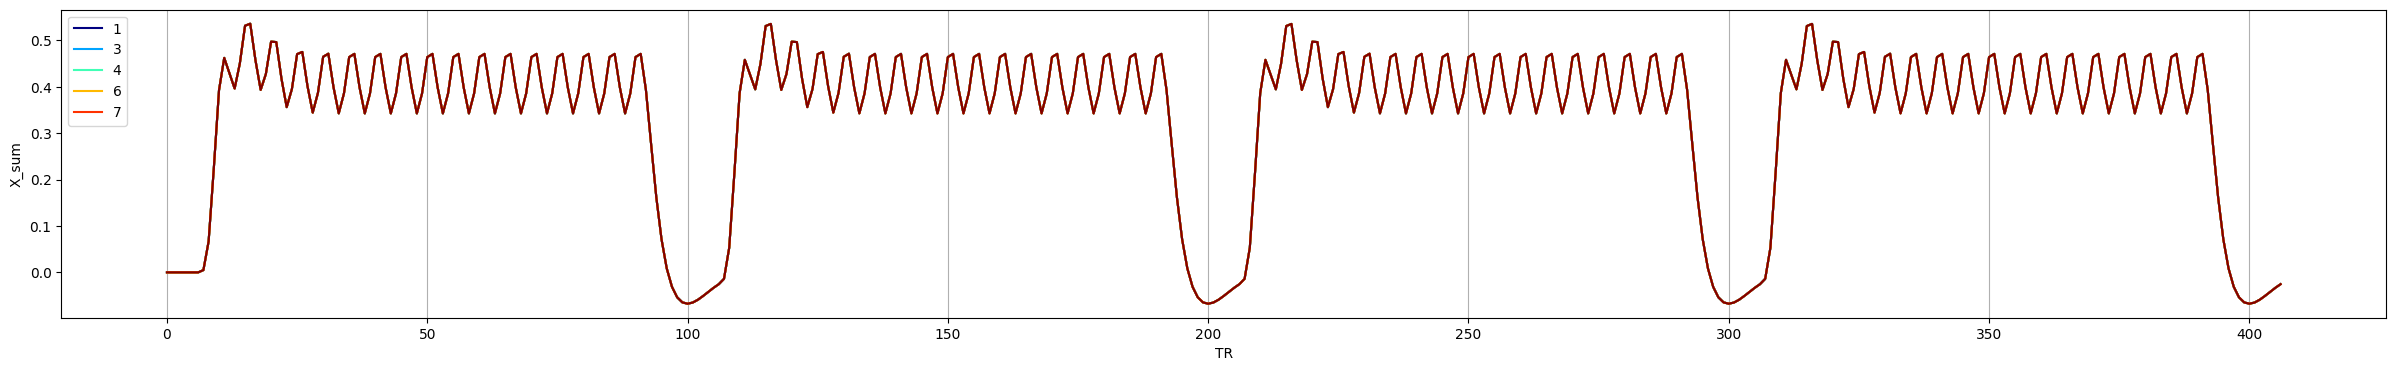

In [33]:
fig, ax = plt.subplots(figsize=(30,4))

g = sns.lineplot(
    data=df,
    x='TR', y='X_sum', hue='run',
    palette=cm.jet.resampled(8),
    ax=ax
)
g.grid(axis='x')
g.legend(loc='upper left')

In [34]:
del SPM, df

#### 3. overall response of $y$ by run

In [8]:
glm = 1
dir_glm = su.get_dir_glm(glm)

In [9]:
dir_result = su.get_dir_result()
dir_work = join(dir_result,'mean_y_across_run')
makedirs(dir_work, exist_ok=True)

In [ ]:
nrows, ncols = 6, 1

for ss in ['S','R']:
    for nn in su.get_list_sn():
        subj = ss+nn
        SPM = join(dir_glm,subj,'SPM.mat')
        df_onset = deal_spm.get_df_onset(SPM)
        onsets_by_run = []
        for rr in range(8):
            run = rr+1
            onsets_by_run.append(
                np.sort(
                    np.concatenate(df_onset[df_onset.run==run].onset.values)
                ).astype(int)
            )
        for roi in simage.get_list_roi():
            fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30*ncols,4*nrows))
            plt.close()
            for ii, param in enumerate([[4,14],[5,15],[6,16],[7,17],[8,18],[9,19]]):
                ax = axs[ii]
                df_y = simage.get_df_y(subj=subj,glm=glm,roi=roi,param=param,hemi='L',show_yraw=False,melt=True)
                g = sns.lineplot(
                    data=df_y[df_y.hue!='y_res'],
                    x='TR', y='y', hue='hue',
                    ax=ax
                )
                handles, labels = g.get_legend_handles_labels()
                g.legend(handles, [r'$%s_{%s}$'%(s.split('_')[0],s.split('_')[1]) for s in labels], loc='upper left', fontsize=12)
                g.grid(axis='x', linestyle='--', color='gray')
                g.set_ylabel(r'mean $y$ across run', fontsize=16)
                g.set_xlabel('TR', fontsize=16)
                xticks = g.get_xticks()[1:-1]
                g.set_xticks(xticks)
                g.set_xticklabels(['%d'%x for x in xticks], fontsize=14)
                yticks = g.get_yticks()[1:-1]
                g.set_yticks(yticks)
                g.set_yticklabels(['%.2f'%y for y in yticks], fontsize=14)
                g.set_title('%s (%s, %s)'%(deal_spm.convert_param_to_hrf(params=param,type='str'), subj, roi))

                for onset in onsets_by_run[ii]:
                    g.axvline(x=onset, color='red', linestyle='--')

            fig.tight_layout()
            # plt.show()
            fig.savefig(
                join(dir_work,'y_mean.%s.%s.png'%(subj,roi)),
                dpi=300, facecolor=[1,1,1,1],
                bbox_inches='tight'
            )

#### 4. Time series time lock to stimulus onset

In [ ]:
glm = 1

In [ ]:
dir_result = su.get_dir_result()
dir_work = join(dir_result,'y_window')
makedirs(dir_work, exist_ok=True)

In [ ]:
nrows, ncols = 4, 2

for ss in ['S','R']:
    for nn in su.get_list_sn():
        subj = ss+nn
        for roi in simage.get_list_roi():
            for param in [[4,14],[5,15],[6,16],[7,17],[8,18],[9,19]]:
                df_window_y = simage.get_df_window_y(subj=subj,glm=glm,roi=roi,param=param)

                fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols,4*nrows))
                axs = np.concatenate(axs)
                plt.close()
                for rr in range(8):
                    ax = axs[rr]
                    run = rr+1
                    g = sns.lineplot(
                        data=df_window_y[df_window_y.run==run],
                        x='TR', y='y', hue='hue',
                        ax=ax
                    )
                    handles, labels = g.get_legend_handles_labels()
                    g.legend(handles, [r'$%s_{%s}$'%(s.split('_')[0],s.split('_')[1]) for s in labels], loc='upper left', fontsize=12)
                    g.grid(axis='x', linestyle='--', color='gray')
                    g.set_ylabel(r'mean $y$ across window', fontsize=16)
                    g.set_xlabel('TR', fontsize=16)
                    xticks = g.get_xticks()[1:-1]
                    g.set_xticks(xticks)
                    g.set_xticklabels(['%d'%x for x in xticks], fontsize=14)
                    yticks = g.get_yticks()[1:-1]
                    g.set_yticks(yticks)
                    g.set_yticklabels(['%.2f'%y for y in yticks], fontsize=14)
                    g.set_title('run%02d (%s, %s, %s)'%(run, subj, roi, str(param)))
                    g.axvline(x=0, color='red', linestyle='-')

                fig.tight_layout()
                # plt.show()
                fig.savefig(
                    join(dir_work,'y_window.%s.%s.%s.png'%(subj,roi,deal_spm.convert_param_to_hrf(params=param,type='str'))),
                    dpi=300, facecolor=[1,1,1,1],
                    bbox_inches='tight'
                )

---

## Load $\beta$

In [ ]:
subj = 'R01'
glm = 3
param = [6,16]
roi = 'M1'

In [ ]:
beta = simage.load_hrf_tune(subj=subj,glm=glm,roi=roi,param=param,map_='beta')
beta

In [ ]:
dir_glm = su.get_dir_glm(glm)
SPM = join(dir_glm,subj,'SPM.mat')
deal_spm.get_df_vec(SPM)

In [ ]:
fig, ax = plt.subplots()

## (# interest, # voxels)
print(beta.shape)
sns.heatmap(beta.get_fdata(),ax=ax)
plt.show()

---

In [ ]:
# %whos